# CS 1656 – Introduction to Data Science (Fall 2021) 

## Instructor: Alexandros Labrinidis
## Teaching Assistants: Evangelos Karageorgos, Xiaoting Li, Gordon Lu

## Term Project 

**Released: October 26, 2021**

**Due: November 30, 2021**

### Goal
The goal of this project is to expose you with a real data science problem, looking at the end-to-end pipeline. 

### What to do 
You are asked to write a Python Jupyter notebook, called `bikes_pgh_data.ipynb` that will:
* [Task 1] access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data  
* [Task 2] create graphs to show the popularity of the different rental stations, given filter conditions  
* [Task 3] create graphs to show the rebalancing issue  
* [Task 4] cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.  

**Your program should not take more than 15 minutes to run**

### Jupyter Notebook Rules
This skeleton is provided for you to complete the project. Please add your code in the code cells below each Task. Feel free to add cells as needed. Do not remove existing cells.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import argparse
import collections
import csv
import numpy
import json
import glob
import math
import os
import re
import requests
import sklearn
import scipy
import string
import sys
import time
import xml

# Feel free to add here any other libraries as specified in the project description

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [2]:
%matplotlib inline

### [Task 0] Warming Up
Task 0 is for testing. It is used to ensure that this Jupyter Notebook skeleton works on both your machines and our machine. Please run the following code to see if you can see a line plot. The line plot is the basic plot that we have seen in Recitation2. 

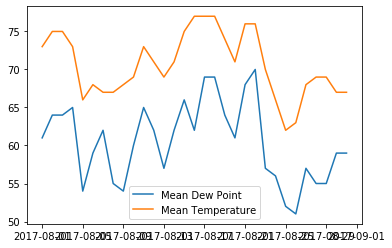

In [233]:
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('KPIT_Aug17.csv', sep=',', engine='python', parse_dates=['EST'])
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])

plt.show()

--- 
Add your code below this line

---
### Task 1

In this task you will need to access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data.

### Task 1.1

For this task, you will need to read in all the CSV data and create appropriate data structures (HINT: use dataframes) to record the following information, for every date (year, month, day), for every station (stationID):

fromCNT = total number of ``from'' bikes at that station for that day (i.e., number of transactions with that stationID in the from column)
toCNT = total number of ``to'' bikes at that station for that day (i.e., number of transactions with that stationID in the to column)
rebalCNT* = total number of ``rebalanced'' bikes. See the next section for an explanation on how to compute this.

In [339]:
#access the file
data = pd.concat([pd.read_csv(f) for f in glob.glob('HealthyRideRentals2021-*.csv')], ignore_index = True)
data.head(20)

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
0,113644569,4/1/2021 0:01,4/1/2021 0:07,70847,412,1097.0,Tennyson Ave & Fifth Ave,49301.0,Centre Ave & N Craig St,Customer
1,113644615,4/1/2021 0:07,4/1/2021 0:14,70527,372,1041.0,Fifth Ave & S Bouquet St,1034.0,Ellsworth Ave & N Neville St,Customer
2,113645757,4/1/2021 1:18,4/1/2021 2:03,70355,2685,1000.0,Liberty Ave & Stanwix St,1000.0,Liberty Ave & Stanwix St,Customer
3,113645762,4/1/2021 1:18,4/1/2021 2:05,70401,2776,1000.0,Liberty Ave & Stanwix St,NaN,BIKE 70401,Customer
4,113645786,4/1/2021 1:20,4/1/2021 9:34,70800,29689,1000.0,Liberty Ave & Stanwix St,1000.0,Liberty Ave & Stanwix St,Customer
5,113645910,4/1/2021 1:25,4/1/2021 9:28,71226,28976,1000.0,Liberty Ave & Stanwix St,1000.0,Liberty Ave & Stanwix St,Customer
6,113645929,4/1/2021 1:25,4/1/2021 9:28,70850,28940,1000.0,Liberty Ave & Stanwix St,1005.0,Forbes Ave & Grant St,Customer
7,113645970,4/1/2021 1:27,4/1/2021 1:33,70665,380,NaN,BIKE 70665,NaN,BIKE 70665,Subscriber
8,113651908,4/1/2021 4:25,4/1/2021 5:04,70438,2359,1068.0,Forbes Ave & Murray Ave,1016.0,17th St & Penn Ave,Customer
9,113652722,4/1/2021 4:46,4/1/2021 4:53,70665,416,NaN,BIKE 70665,1024.0,S Negley Ave & Baum Blvd,Subscriber


In [340]:
#isolate necessary columns for rebalancing
rebal = data[['Trip id', 'Starttime', 'Bikeid', 'From station id', 'To station id']].copy()
rebal = rebal.fillna(0)
rebal.head(20)

,Trip id,Starttime,Bikeid,From station id,To station id
0,113644569,4/1/2021 0:01,70847,1097.0,49301.0
1,113644615,4/1/2021 0:07,70527,1041.0,1034.0
2,113645757,4/1/2021 1:18,70355,1000.0,1000.0
3,113645762,4/1/2021 1:18,70401,1000.0,0.0
4,113645786,4/1/2021 1:20,70800,1000.0,1000.0
5,113645910,4/1/2021 1:25,71226,1000.0,1000.0
6,113645929,4/1/2021 1:25,70850,1000.0,1005.0
7,113645970,4/1/2021 1:27,70665,0.0,0.0
8,113651908,4/1/2021 4:25,70438,1068.0,1016.0
9,113652722,4/1/2021 4:46,70665,0.0,1024.0


In [341]:
#add in the timestamps
def convert(x):
    date = pd.Timestamp(x)
    return date

rebal['From Date'] = rebal['Starttime'].apply(convert)

In [342]:
#reindex rebalancing frame
rebal = rebal.sort_values(by=['Bikeid', 'From Date'])
rebal = rebal.reset_index(drop=True)
rebal.head(20)

,Trip id,Starttime,Bikeid,From station id,To station id,From Date
0,111414217,1/14/2021 11:37,70004,0.0,1061.0,2021-01-14 11:37:00
1,111486270,1/18/2021 16:02,70004,49951.0,1009.0,2021-01-18 16:02:00
2,111833601,2/4/2021 16:47,70004,0.0,1061.0,2021-02-04 16:47:00
3,111945632,2/11/2021 16:11,70004,49641.0,49801.0,2021-02-11 16:11:00
4,112239963,2/24/2021 11:54,70004,49801.0,49801.0,2021-02-24 11:54:00
5,112353493,2/27/2021 15:51,70004,49801.0,49801.0,2021-02-27 15:51:00
6,112354444,2/27/2021 17:14,70004,49801.0,49921.0,2021-02-27 17:14:00
7,112355324,2/27/2021 18:46,70004,49921.0,1001.0,2021-02-27 18:46:00
8,112624462,3/6/2021 17:36,70004,1001.0,1001.0,2021-03-06 17:36:00
9,112649129,3/7/2021 13:54,70004,1001.0,1012.0,2021-03-07 13:54:00


In [343]:
#check for rebalancing
def checkRebal(x):
    edge = x.name
    if edge != 0: 
        prev = rebal.iloc[edge-1]
        if x['From station id'] != prev['To station id'] and x['Bikeid'] == prev['Bikeid']:
            return True

    return False

rebal['rebal'] = rebal.apply(checkRebal, axis=1)
rebal.head(20)

,Trip id,Starttime,Bikeid,From station id,To station id,From Date,rebal
0,111414217,1/14/2021 11:37,70004,0.0,1061.0,2021-01-14 11:37:00,False
1,111486270,1/18/2021 16:02,70004,49951.0,1009.0,2021-01-18 16:02:00,True
2,111833601,2/4/2021 16:47,70004,0.0,1061.0,2021-02-04 16:47:00,True
3,111945632,2/11/2021 16:11,70004,49641.0,49801.0,2021-02-11 16:11:00,True
4,112239963,2/24/2021 11:54,70004,49801.0,49801.0,2021-02-24 11:54:00,False
5,112353493,2/27/2021 15:51,70004,49801.0,49801.0,2021-02-27 15:51:00,False
6,112354444,2/27/2021 17:14,70004,49801.0,49921.0,2021-02-27 17:14:00,False
7,112355324,2/27/2021 18:46,70004,49921.0,1001.0,2021-02-27 18:46:00,False
8,112624462,3/6/2021 17:36,70004,1001.0,1001.0,2021-03-06 17:36:00,False
9,112649129,3/7/2021 13:54,70004,1001.0,1012.0,2021-03-07 13:54:00,False


In [344]:
#add in the date
def getDate(x):
    x = x.split()
    date = pd.Timestamp(x[0])
    return date.date()

data['From Date'] = data['Starttime'].apply(getDate)
data['To Date'] = data['Stoptime'].apply(getDate)
data.head(20)

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,From Date,To Date
0,113644569,4/1/2021 0:01,4/1/2021 0:07,70847,412,1097.0,Tennyson Ave & Fifth Ave,49301.0,Centre Ave & N Craig St,Customer,2021-04-01,2021-04-01
1,113644615,4/1/2021 0:07,4/1/2021 0:14,70527,372,1041.0,Fifth Ave & S Bouquet St,1034.0,Ellsworth Ave & N Neville St,Customer,2021-04-01,2021-04-01
2,113645757,4/1/2021 1:18,4/1/2021 2:03,70355,2685,1000.0,Liberty Ave & Stanwix St,1000.0,Liberty Ave & Stanwix St,Customer,2021-04-01,2021-04-01
3,113645762,4/1/2021 1:18,4/1/2021 2:05,70401,2776,1000.0,Liberty Ave & Stanwix St,NaN,BIKE 70401,Customer,2021-04-01,2021-04-01
4,113645786,4/1/2021 1:20,4/1/2021 9:34,70800,29689,1000.0,Liberty Ave & Stanwix St,1000.0,Liberty Ave & Stanwix St,Customer,2021-04-01,2021-04-01
5,113645910,4/1/2021 1:25,4/1/2021 9:28,71226,28976,1000.0,Liberty Ave & Stanwix St,1000.0,Liberty Ave & Stanwix St,Customer,2021-04-01,2021-04-01
6,113645929,4/1/2021 1:25,4/1/2021 9:28,70850,28940,1000.0,Liberty Ave & Stanwix St,1005.0,Forbes Ave & Grant St,Customer,2021-04-01,2021-04-01
7,113645970,4/1/2021 1:27,4/1/2021 1:33,70665,380,NaN,BIKE 70665,NaN,BIKE 70665,Subscriber,2021-04-01,2021-04-01
8,113651908,4/1/2021 4:25,4/1/2021 5:04,70438,2359,1068.0,Forbes Ave & Murray Ave,1016.0,17th St & Penn Ave,Customer,2021-04-01,2021-04-01
9,113652722,4/1/2021 4:46,4/1/2021 4:53,70665,416,NaN,BIKE 70665,1024.0,S Negley Ave & Baum Blvd,Subscriber,2021-04-01,2021-04-01


In [345]:
data_1 = data[['From Date','Starttime','From station id', 'Trip id', 'Bikeid', 'To station id', 'To Date']].copy()
from_data = data_1[['From Date','From station id']].copy()
to_data = data_1[['To Date', 'To station id']].copy()
rebal_data = rebal[['From Date', 'From station id', 'rebal']].copy()

In [346]:
#new title
from_data['Direction'] = 'fromCNT'
from_data.columns = ['Date','Station ID', 'Direction']


In [347]:
to_data['Direction'] = 'toCNT'
to_data.columns = ['Date','Station ID', 'Direction']

In [348]:
rebal_data['Direction'] = 'rebalCNT'
rebal_data.columns = ['Date','Station ID', 'rebal','Direction']

In [349]:
def getDateNotTime(x):
    return x.date()

rebal_data['From date'] = rebal_data['Date'].apply(getDateNotTime)

In [350]:
iso = from_data.append(to_data, ignore_index = True)
iso = iso.append(rebal_data, ignore_index = True)

In [351]:
iso = iso.sort_values('Station ID')

In [545]:
copy = rebal_data[rebal_data['Direction'] == False].index
rebal_data.drop(copy, inplace=True)
copy = iso[iso['Station ID'] == 0].index
iso.drop(copy, inplace=True)
iso = iso.sort_values('Station ID')

In [353]:
finalCNT = pd.crosstab([iso["Date"], iso["Station ID"]], iso["Direction"])
finalCNT = cross.sort_values("Date")

In [354]:
finalCNT.head(20)

Direction                       fromCNT  rebalCNT  toCNT
Date                Station ID                          
2021-01-01 00:59:00 1028.0            0         1      0
2021-01-01          1032.0            1         0      0
                    1028.0            1         0      1
                    1024.0            1         0      1
                    1017.0            0         0      1
2021-01-01 21:40:00 49301.0           0         1      0
2021-01-01          1002.0            1         0      1
2021-01-01 12:13:00 49671.0           0         1      0
2021-01-01 12:16:00 1010.0            0         1      0
2021-01-01 14:15:00 1024.0            0         1      0
2021-01-01 14:36:00 1094.0            0         1      0
2021-01-01          1059.0            1         0      1
                    1094.0            2         0      0
2021-01-01 12:02:00 1002.0            0         1      0
2021-01-01          49301.0           1         0      2
                    49671.0           1         0      0
                    49951.0           1         0      0
2021-01-01 02:23:00 1032.0            0         1      0
2021-01-01 06:48:00 1062.0            0         1      0
2021-01-01 06:54:00 1062.0            0         1      0

### Task 1.2

Task 1.2 Print the first 20 rows of the data structure you used to store the above data (i.e., monthly breakdown).

In [530]:
byMonth = iso.copy()
iso = iso.sort_values('Station ID')

In [356]:
def getMonth(x):
    return x.month

byMonth['Date'] = byMonth['Date'].apply(getMonth)

In [357]:
byMonth = pd.crosstab([byMonth["Date"], byMonth["Station ID"]], byMonth['Direction'],dropna=False, margins=False)

byMonth.head(20)

Direction        fromCNT  rebalCNT  toCNT
Date Station ID                          
1    1000.0           23        23     29
     1001.0           18        18     27
     1002.0           27        27     27
     1003.0            2         2      1
     1004.0           20        20     16
     1005.0            6         6      3
     1006.0            8         8      8
     1007.0            9         9      7
     1008.0            0         0      0
     1009.0            8         8      3
     1010.0           47        47     30
     1011.0            7         7     17
     1012.0           50        50     52
     1013.0           26        26     24
     1014.0            5         5      2
     1015.0           16        16     16
     1016.0           21        21     28
     1017.0           61        61     70
     1018.0           12        12     18
     1019.0           18        18     34

---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [358]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
#                     as they are and should be used by your code accordingly from this point on

filter_month = 4
filter_stationID = 1046


### Task 2.1

Task 2.1 Show a bar chart for the 20 most popular bikestations when considering the number of fromCNT per station (for filter_month). Y axis should be the fromCNT per station, X axis should be the stationID. The first stationID corresponds to the most popular station.

In [547]:
from_month = data_1[['From Date','From station id']].copy()

from_month

,From Date,From station id
0,2021-04-01,1097.0
1,2021-04-01,1041.0
2,2021-04-01,1000.0
3,2021-04-01,1000.0
4,2021-04-01,1000.0
...,...,...
69127,2021-01-31,NaN
69128,2021-01-31,1036.0
69129,2021-01-31,1069.0
69130,2021-01-31,1028.0


In [548]:
iso = iso.sort_values('Station ID')

In [549]:
from_month.drop(from_month[from_month['From station id'] == 0].index, inplace=True)
from_month.head(20)

,From Date,From station id
0,2021-04-01,1097.0
1,2021-04-01,1041.0
2,2021-04-01,1000.0
3,2021-04-01,1000.0
4,2021-04-01,1000.0
5,2021-04-01,1000.0
6,2021-04-01,1000.0
7,2021-04-01,NaN
8,2021-04-01,1068.0
9,2021-04-01,NaN


In [550]:
from_month = from_month.sort_values('From station id')

In [551]:
#add in the month data
def getMonth(x):
    return x.month

from_month['From Date'] = from_month['From Date'].apply(getMonth)

In [553]:

from_month = from_month.loc[from_month['From Date'] == filter_month]
from_month = from_month['From station id'].groupby([from_month['From station id']]).count()
from_month = from_month.sort_values(ascending=False)

In [537]:
counts = from_month.tolist()
keys = from_month.keys()
from_month = from_month.sort_values(ascending=False)

In [538]:
daypermonth = {1:['January', 31], 2:['February', 28], 3:['March', 31], 4:['April', 30], 
                5:['May', 31], 6:['June', 30], 7:['July', 31], 8:['August', 31], 9:['September', 30], 
                10:['October', 31], 11:['November', 30], 12:['December', 31]}

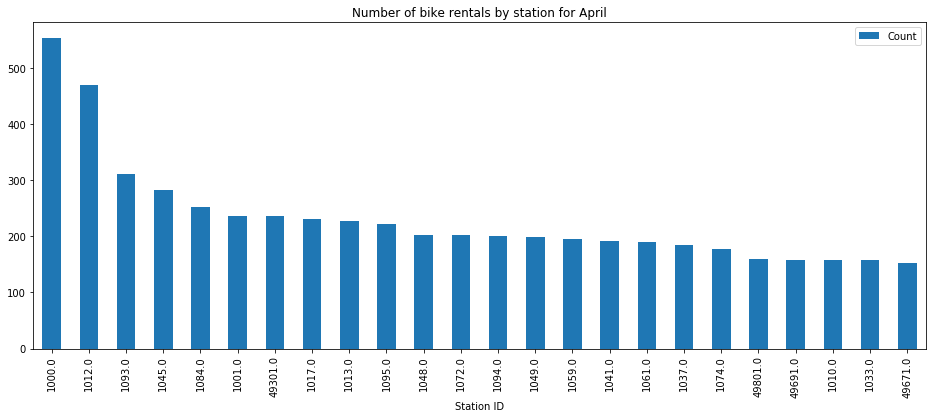

In [539]:
df = pd.DataFrame({'Station ID':keys[0:24], 'Count':counts[0:24]})
ax = df.plot.bar(x='Station ID', y='Count', title='Number of bike rentals by station for ' + daypermonth[filter_month][0], figsize=(16,6))

### Task 2.2

Task 2.2 For the filter_month and for the filter_stationID show a graph that shows the distribution of bike rentals throughout the month, for that station only. Y axis should be the fromCNT for that stationID for that day, X axis would be the different days in that month (i.e., 1 - 30 for April).

In [562]:
from_station = data_1[['From Date','From station id']].copy()

In [563]:
def getDay(x):
    return x.day

from_station['From Date'] = from_station['From Date'].apply(getDay)

In [564]:
from_station = from_station.sort_values('From Date')
from_station = from_station.loc[from_station['From station id'] == filter_stationID]
from_station = from_station['From Date'].groupby([from_station['From Date']]).count()


In [565]:
counts = from_station.tolist()
keys = from_station.keys()
from_month = from_month.sort_values(ascending=False)

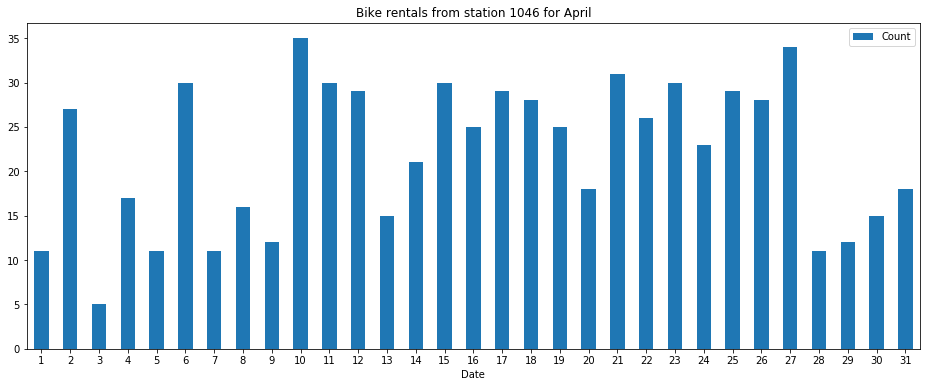

In [559]:
df = pd.DataFrame({'Date':keys, 'Count':counts})
ax = df.plot.bar(x='Date', y='Count', rot=0, title='Bike rentals from station ' + str(filter_stationID) + ' for ' + daypermonth[filter_month][0], figsize=(16,6))

### Task 2.3

Task 2.3 For the filter_month (e.g., April) show a graph that shows the distribution of bike rentals throughout the day, for all stations. Y axis should be the fromCNT for all stations in the filter_month, X axis would be the different hours in a day (i.e., 0 - 23).

In [491]:
from_station = data_1[['Starttime','From station id']].copy()

In [492]:

data_1

,From Date,Starttime,From station id,Trip id,Bikeid,To station id,To Date
0,2021-04-01,4/1/2021 0:01,1097.0,113644569,70847,49301.0,2021-04-01
1,2021-04-01,4/1/2021 0:07,1041.0,113644615,70527,1034.0,2021-04-01
2,2021-04-01,4/1/2021 1:18,1000.0,113645757,70355,1000.0,2021-04-01
3,2021-04-01,4/1/2021 1:18,1000.0,113645762,70401,NaN,2021-04-01
4,2021-04-01,4/1/2021 1:20,1000.0,113645786,70800,1000.0,2021-04-01
...,...,...,...,...,...,...,...
69127,2021-01-31,1/31/2021 15:23,NaN,111744111,70650,1023.0,2021-01-31
69128,2021-01-31,1/31/2021 16:07,1036.0,111744432,70641,1094.0,2021-01-31
69129,2021-01-31,1/31/2021 16:12,1069.0,111744453,70826,1069.0,2021-01-31
69130,2021-01-31,1/31/2021 16:26,1028.0,111744562,71194,1023.0,2021-01-31


In [493]:
#couldnt figure out how to turn the time into integers; the basic gist of this section is just to 
#do what was above with the added step of making the times integers to be plotted on the x axis

In [495]:
from_station = from_station.sort_values('Starttime')

from_station = from_station.loc[from_station['From station id'] == filter_stationID]
from_station = from_station.loc[from_station['Starttime'] == daypermonth[filter_month][0]]
from_station = from_station['Starttime'].groupby([from_station['Starttime']]).count()

In [496]:
for from_station['Starttime'] in from_station:
    temp = datetime.datetime.strptime('Starttime', "%H:%M:%S")
    date_time = datetime.insert(temp)

In [499]:
keys = from_station.keys()
counts = from_station.tolist()

In [500]:
keys

Index([], dtype='object', name='Starttime')

In [501]:
for i in range(1, 24+1):
    if i not in keys:
        keys = keys.insert(i - 1, i)
        counts.insert(i - 1, 0)

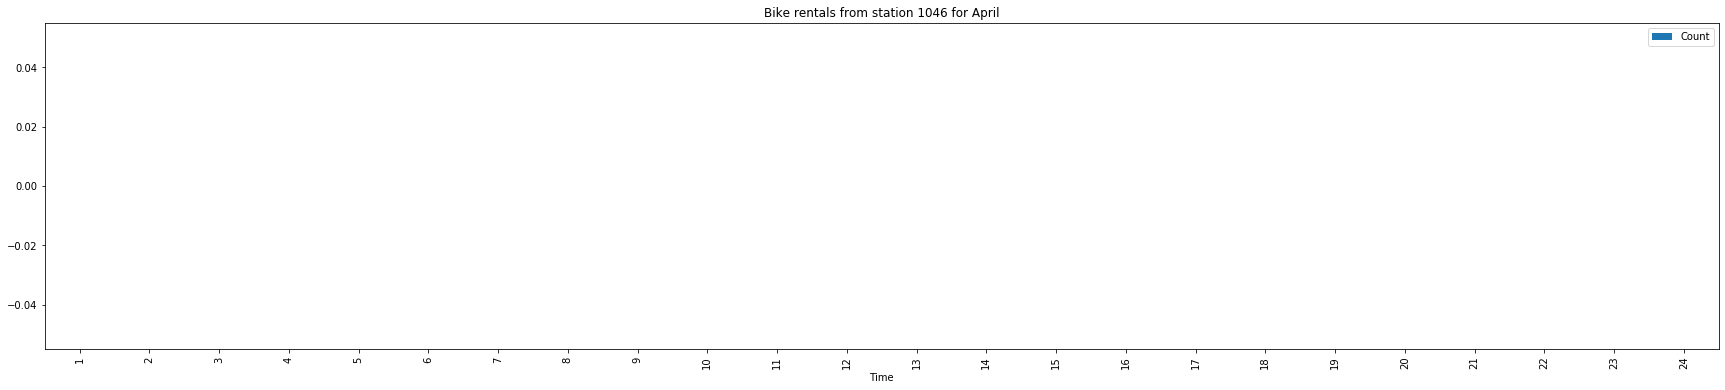

In [503]:
df = pd.DataFrame({'Time':keys, 'Count':counts})
ax = df.plot.bar(x='Time', y='Count', rot=90, title='Bike rentals from station ' + str(filter_stationID) + ' for ' + daypermonth[filter_month][0], figsize=(30,6))

### Task 2.4

Task 2.4 Update your data structure to compute the total number of rentals each bike had for each day (regardless of station). In other words, figure out how many times a bike was listed in the input data, for each different date. For the filter_month, show a graph that shows the 20 most popular bikes. Y axis should be the number of times a bike was rented, X axis should be the bikeID. The first bikeID corresponds to the most popular station.

In [567]:
rentals = data_1[['From Date','Bikeid']].copy()

In [568]:
def getMonth(x):
    return x.month
rentals['From Date'] = rentals['From Date'].apply(getMonth)

In [569]:
rentals = rentals.loc[rentals['From Date'] == filter_month]
rentals = rentals.groupby(['Bikeid'])['Bikeid'].count()
rentals = rentals.sort_values(ascending=False)
rentals.head(20)

Bikeid
70587    51
71209    48
70955    46
70691    43
71214    42
71205    41
70221    41
70544    41
71225    40
71193    39
71167    39
70931    37
70770    36
70710    36
70815    36
71188    36
70564    36
70455    36
70508    35
71176    35
Name: Bikeid, dtype: int64

In [570]:
counts = rentals.tolist()
keys = rentals.keys()
rentals = rentals.sort_values(ascending=False)

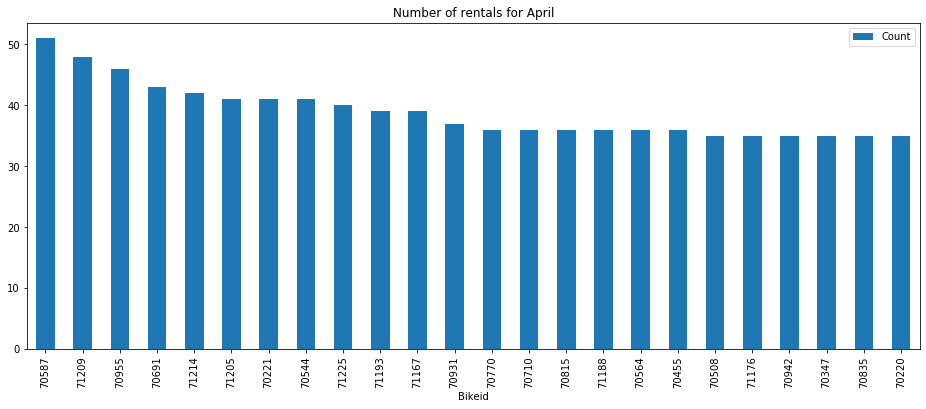

In [529]:
df = pd.DataFrame({'Bikeid':keys[0:24], 'Count':counts[0:24]})
ax = df.plot.bar(x='Bikeid', y='Count', title='Number of rentals for ' + daypermonth[filter_month][0], figsize=(16,6))

---
### Task 3

In this task you will create graphs to show the rebalancing issue.

### Task 3.1

Task 3.1 Show a bar chart for the 20 most popular bikestations when considering the number of rebalCNT per station (for filter_month). Y axis should be the rebalCNT per station, X axis should be the stationID. The first stationID corresponds to the most demanding station in terms of rebalancing.



In [457]:
rebal_month = rebal[['From Date', 'From station id', 'rebal']].copy()

In [458]:
copy2 = rebal_month[rebal_month['rebal'] == False].index
rebal_month.drop(copy2, inplace=True)

In [459]:
def getDateNotTime(x):
    return x.date()

rebal_month['From Date'] = rebal_month['From Date'].apply(getDateNotTime)
rebal_month

,From Date,From station id,rebal
1,2021-01-18,49951.0,True
2,2021-02-04,0.0,True
3,2021-02-11,49641.0,True
26,2021-04-07,1088.0,True
27,2021-04-08,0.0,True
...,...,...,...
69121,2021-09-16,1060.0,True
69122,2021-09-16,49671.0,True
69123,2021-09-17,49671.0,True
69124,2021-09-19,1048.0,True


In [460]:
rebal_month = rebal_month.sort_values('From station id')

In [461]:
copy = rebal_month[rebal_month['From station id'] == 0].index
rebal_month.drop(copy, inplace=True)

In [462]:
def getMonth(x):
    return x.month

rebal_month['From Date'] = rebal_month['From Date'].apply(getMonth)

In [463]:
rebal_month = rebal_month.loc[rebal_month['From Date'] == filter_month]
rebal_month = rebal_month['From station id'].groupby([rebal_month['From station id']]).count()
rebal_month = rebal_month.sort_values(ascending=False)
rebal_month

From station id
1094.0     121
1061.0     103
1040.0      51
1022.0      35
1068.0      31
          ... 
1095.0       1
1027.0       1
1064.0       1
1017.0       1
88887.0      1
Name: From station id, Length: 95, dtype: int64

In [388]:
keys = rebal_month.keys()
counts = rebal_month.tolist()

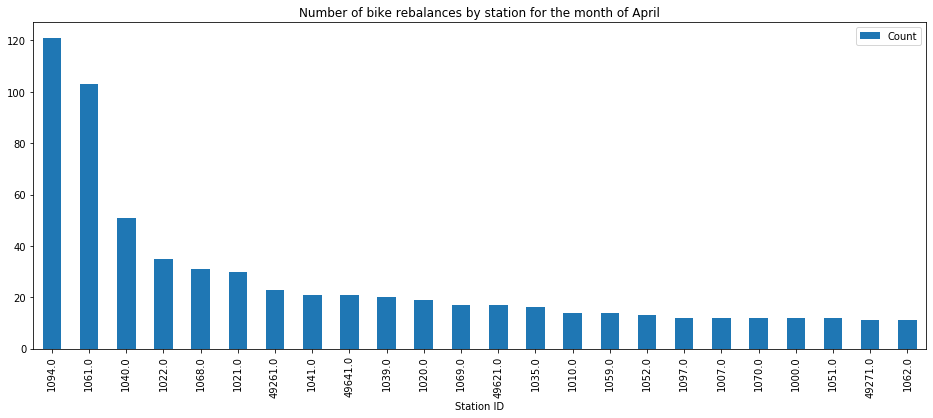

In [389]:
df = pd.DataFrame({'Station ID':keys[0:24], 'Count':counts[0:24]})
ax = df.plot.bar(x='Station ID', y='Count', title='Number of bike rebalances by station for the month of ' + daypermonth[filter_month][0], figsize=(16,6))

### Task 3.2

Task 3.2 For the filter_month and for the filter_stationID show a graph that shows the distribution of bike rebalancing throughout the month, for that station only. Y axis should be the rebalCNT for that stationID for that day, X axis would be the different days in that month (i.e., 1 - 30 for April).

In [412]:
rebal_station = rebal[['From Date', 'From station id', 'rebal']].copy()

In [413]:
copy3 = rebal_station[rebal_station['rebal'] == False].index
rebal_station.drop(copy3, inplace=True)

In [414]:
def getDateNotTime(x):
    return x.date()

rebal_station['From Date'] = rebal_station['From Date'].apply(getDateNotTime)

In [415]:
rebal_station = rebal_station.drop(['rebal'], axis=1)

In [416]:
def getDay(x):
    return x.day

rebal_station['From Date'] = rebal_station['From Date'].apply(getDay)

In [417]:
rebal_station = rebal_station.loc[rebal_station['From station id'] == filter_stationID]
rebal_station = rebal_station['From Date'].groupby([rebal_station['From Date']]).count()

In [418]:
keys = rebal_station.keys()
counts = rebal_station.tolist()

In [419]:
for i in range(1, daypermonth[filter_month][1] + 1):
    if i not in keys:
        keys = keys.insert(i - 1, i)
        counts.insert(i - 1, 0)

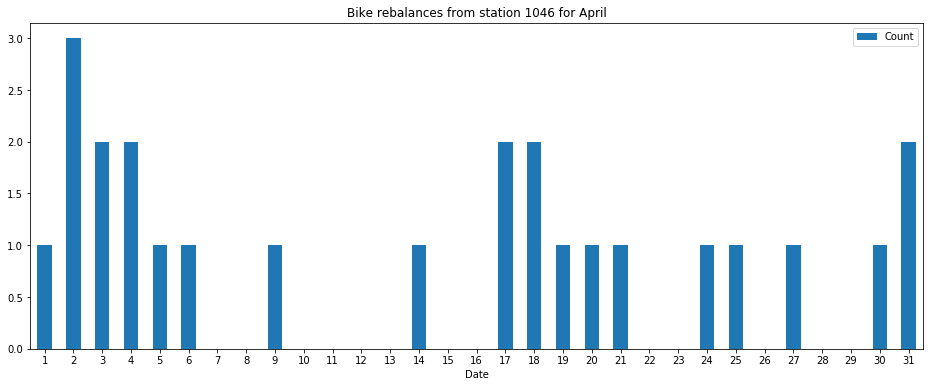

In [420]:
df = pd.DataFrame({'Date':keys, 'Count':counts})
ax = df.plot.bar(x='Date', y='Count', rot=0, title='Bike rebalances from station ' + str(filter_stationID) + ' for '  + daypermonth[filter_month][0], figsize=(16,6))

---
### Task 4

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

### Task 4.1

Task 4.1 You should perform clustering on the above 6-dimensional space using K-means (with at least 3 different values for K) and DBSCAN (with at least three different value combinations for min_samples and eps) https://scikit-learn.org/stable/modules/clustering.html#clustering.

In [305]:
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
#https://scikit-learn.org/stable/modules/clustering.html

cluster_params = [2, 3, 4, [55, 12], [60, 14], [70, 7]]
labels1 = labels2 = labels3 = labels4 = labels5 = labels6 = ""
labels = [labels1, labels2, labels3, labels4, labels5, labels6]

In [455]:
byMonth = iso.copy()
def getMonth(x):
    return x.month

byMonth['Date'] = byMonth['Date'].apply(getMonth)
byMonth = pd.crosstab(byMonth["Date"], [byMonth["Station ID"], byMonth['Direction']],dropna=False, margins=False)
byMonth

Station ID 1000.0                 1001.0                 1002.0            \
Direction  fromCNT rebalCNT toCNT fromCNT rebalCNT toCNT fromCNT rebalCNT   
Date                                                                        
1               23       23    29      18       18    27      27       27   
2               33       33    36      14       14    25      27       27   
3              399      399   441     180      180   221     125      125   
4              553      553   592     236      236   255     145      145   
5              834      834   881     342      342   362      97       97   
6              811      811   833     366      366   388     144      144   
7                0        0     0       0        0     0       0        0   
9              409      409   470     234      234   251     138      138   
10               0        0     0       0        0     1       0        0   

Station ID       1003.0   ... 88882.0 88883.0                88886.0           \
Direction  toCNT fromCNT  ...   toCNT fromCNT rebalCNT toCNT fromCNT rebalCNT   
Date                      ...                                                   
1             27       2  ...       0       0        0     0       0        0   
2             28      10  ...       0       0        0     0       0        0   
3            142      54  ...       0       0        0     0       1        1   
4            156      42  ...       0       0        0     0       0        0   
5             87      86  ...       0       0        0     0       0        0   
6            153      83  ...       0       0        0     1       0        0   
7              0       0  ...       0       0        0     0       0        0   
9            146      96  ...       0       1        1     0       0        0   
10             0       0  ...       0       0        0     0       0        0   

Station ID       88887.0                 
Direction  toCNT fromCNT rebalCNT toCNT  
Date                                     
1              0       1        1     0  
2              0       1        1     0  
3              1       0        0     0  
4              0       1        1     0  
5              0       0        0     0  
6              0       0        0     0  
7              0       0        0     0  
9              0       0        0     0  
10             0       0        0     0  

[9 rows x 342 columns]

In [309]:
six_dim = byMonth.copy()
six_dim = six_dim.loc[0:2]
six_dim

Station ID 1000.0                 1001.0                 1002.0            \
Direction  fromCNT rebalCNT toCNT fromCNT rebalCNT toCNT fromCNT rebalCNT   
Date                                                                        
1               23       23    29      18       18    27      27       27   
2               33       33    36      14       14    25      27       27   

Station ID       1003.0   ... 88882.0 88883.0                88886.0           \
Direction  toCNT fromCNT  ...   toCNT fromCNT rebalCNT toCNT fromCNT rebalCNT   
Date                      ...                                                   
1             27       2  ...       0       0        0     0       0        0   
2             28      10  ...       0       0        0     0       0        0   

Station ID       88887.0                 
Direction  toCNT fromCNT rebalCNT toCNT  
Date                                     
1              0       1        1     0  
2              0       1        1     0  

[2 rows x 342 columns]

In [310]:
#this actually took forever to figure out, unstacking lets me sample from different CNTs
six_dim = six_dim.T
six_dim = six_dim.unstack()
six_dim

Date             1                      2               
Direction  fromCNT rebalCNT toCNT fromCNT rebalCNT toCNT
Station ID                                              
1000.0          23       23    29      33       33    36
1001.0          18       18    27      14       14    25
1002.0          27       27    27      27       27    28
1003.0           2        2     1      10       10    12
1004.0          20       20    16       7        7     5
...            ...      ...   ...     ...      ...   ...
49951.0         18       18    15      18       18    15
88882.0          2        2     0       0        0     0
88883.0          0        0     0       0        0     0
88886.0          0        0     0       0        0     0
88887.0          1        1     0       1        1     0

[114 rows x 6 columns]

In [311]:
#just relabeling
six_dim.columns = ['fromCNT0', 'rebalCNT0', 'fromCNT1', 'rebalCNT1', 'fromCNT2', 'rebalCNT2']
six_dim = six_dim[['fromCNT0', 'rebalCNT0', 'fromCNT1', 'rebalCNT1', 'fromCNT2', 'rebalCNT2']]

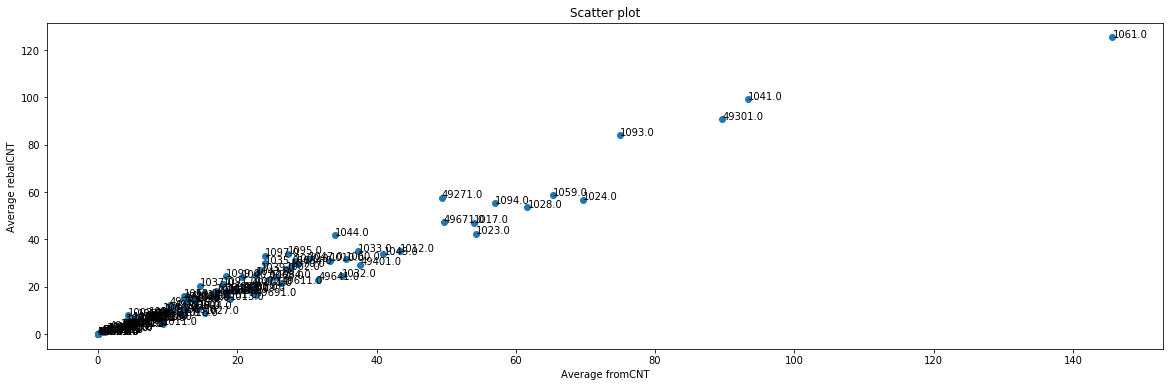

In [454]:
#scatter plot (look at those outliers!) plugged and chugged from lab code
fig = plt.figure(figsize=(20,6))

plt.scatter(six_dim[['fromCNT0', 'fromCNT1',  'fromCNT2']].mean(axis=1),
            six_dim[['rebalCNT0', 'rebalCNT1', 'rebalCNT2']].mean(axis=1))

[plt.text(((row.fromCNT0 + row.fromCNT1 + row.fromCNT2)/3), 
 ((row.rebalCNT0 + row.rebalCNT1 + row.rebalCNT2)/3), row.Index) for row in six_dim.itertuples()]
plt.title('Scatter plot')
plt.xlabel('Average fromCNT')
plt.ylabel('Average rebalCNT')
plt.show()


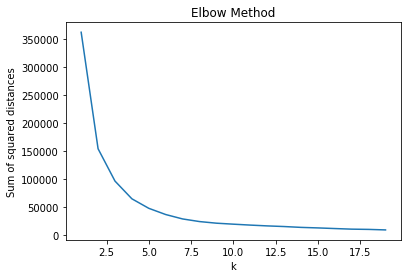

In [450]:
#elbow graph adapted from scikit learn documentation
squared_distances = []
for i in range(1,20):
    km = KMeans(n_clusters=k, init='k-means++', random_state=5000)
    km = km.fit(six_dim)
    squared_distances.append(km.inertia_)
    
plt.plot(range(1,20), Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()


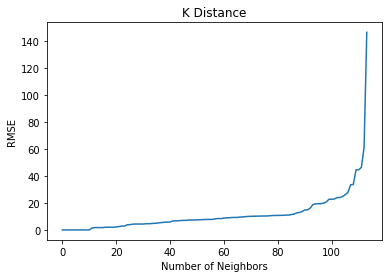

In [447]:
#kdistance adapted from scikit learn documentation
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(six_dim)
distances, indices = nbrs.kneighbors(six_dim)
distances = np.sort(distances, axis=0)
distances = distances[:,2]
plt.plot(distances)
    
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.title('K Distance')
plt.show()

### Task 4.2

Task 4.2 You should generate one bar chart per algorithm option (i.e., 6 different charts) showing the distribution of the number of stations per cluster. Y axis should be the number of stations in that cluster, X axis would be the clusterID. The first clusterID corresponds to the biggest cluster. Make sure each graph is properly labeled with the algorithm name and the parameters used.

In [441]:
cluster_params = [2, 3, 4, [55, 12], [60, 14], [70, 7]]
labels1 = labels2 = labels3 = labels4 = labels5 = labels6 = ""
labels = [labels1, labels2, labels3, labels4, labels5, labels6]

In [442]:
for i in range (0, 3):
    #clustering = DBSCAN(eps=3, min_samples=2).fit(X)
    dbscan = DBSCAN(eps=cluster_params[i + 3][0], min_samples=cluster_params[i + 3][1]).fit(six_dim)
    dbscan.labels_ = labels[i + 3] 
    #kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
    kmeans = KMeans(n_clusters=cluster_params[i], init='k-means++', random_state=5000).fit(six_dim)
    kmeans.labels_ = labels[i] 
   

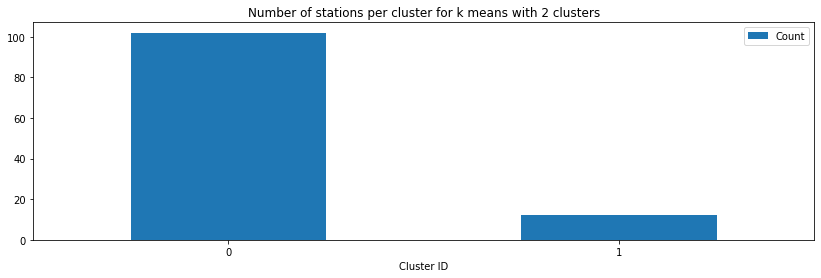

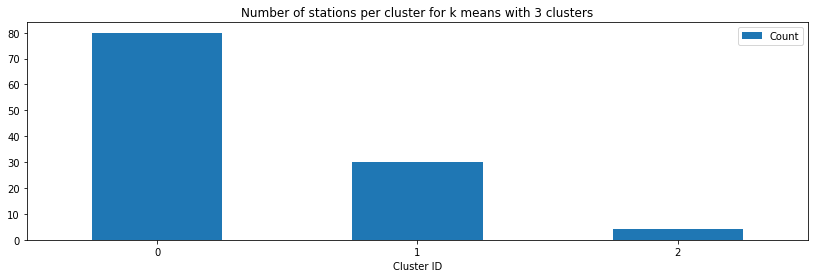

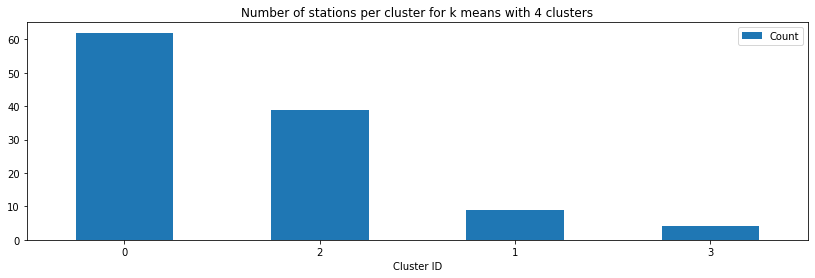

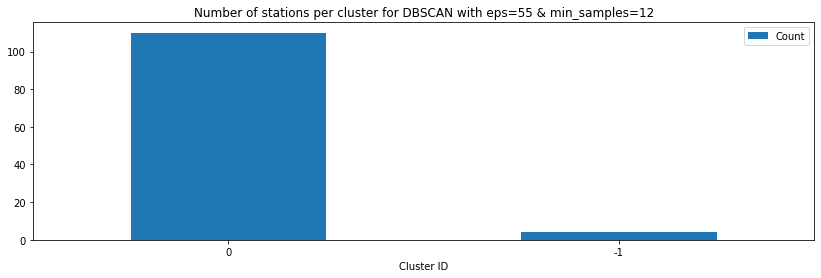

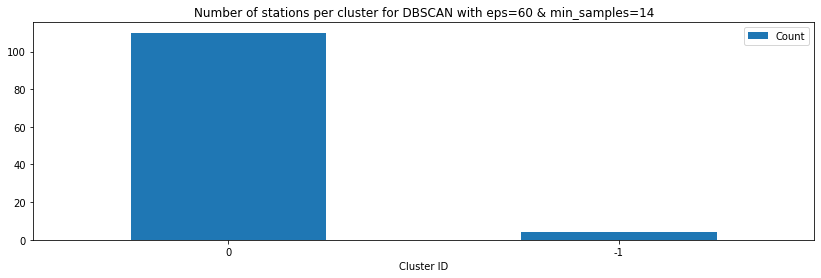

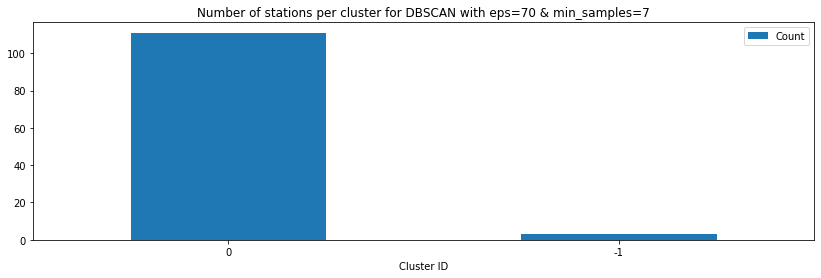

In [440]:
for i in range (0, 6):
    unique_i, counts_i = np.unique(labels[i], return_counts=True)
    #zip = tuple, list = list, sorted in reverse
    vals = zip(unique_i, counts_i)
    vals = list(vals)
    vals = sorted(vals, key = lambda x: x[1], reverse=True)
   
    df = pd.DataFrame({'Cluster ID':[x[0] for x in vals], 'Count':[x[1] for x in vals]})
    if i < 3:
        ax = df.plot.bar(x='Cluster ID', y='Count', rot=0, title='Number of stations per cluster for k means with ' + str(cluster_params[i]) + ' clusters', figsize=(14,4))
    else:
        ax = df.plot.bar(x='Cluster ID', y='Count', rot=0, title='Number of stations per cluster for DBSCAN with eps=' + str(cluster_params[i][0]) + ' & min_samples=' + str(cluster_params[i][1]), figsize=(14,4))

### Task 4.3

Task 4.3 You should provide a brief explanation about your optimal choice of K. You should utilize the Elbow method on a reasonable range of K values. You should also mention (a) what is the best value of K that you found and (b) what is the best algorithm out of the two that you tried. For the second question, it is possible the results will be inconclusive.

Kmeans is better since when we look at the data, while most points are bunched together, the rest are scattered as outliers. DBSCAN however, makes it hard to understand past 2 clusters. 


(a) We see that the best value K value is 4. In reference to the elbow method, number of clusters past 4 lead to distortion of the the data, and any clusters that are -1 are labeled as noise.

(b) K means lets you control in classification, despite being sensitive to outliers. However, this lets us look at potential influential points. For example, a small cluster may be considered noise in DBSCAN, but k means allows us to look at the min and max departed stations. 